/home/romuald/ENSEIGNEMENT/1-JupyterNotebooks/pyPhysChem



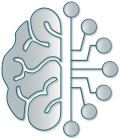

**Start at:** Monday 15 September 2025, 14:13:53  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color,bg,fg,hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# Molecular representations. Nano and materials

## Building things with ase

<div class="intro">
    
ASE is an Atomic Simulation Environment written in the Python programming language with the aim of setting up, steering, and analyzing atomistic simulations. ASE is quite flexible, and you can indeed build clusters, carbon nanotubes, molecules, bulk crystals, and surfaces with it. It provides a set of constructors and utilities for setting up atomic structures before running calculations (DFT, classical, machine learning, etc.)

In this tutorial, we will focus on the construction of clusters and nanoparticles (NPs) using the Atomic Simulation Environment (ASE).
Unlike bulk crystals or surfaces, clusters and nanoparticles represent finite systems with a large surface-to-volume ratio, making them highly relevant in nanoscience and catalysis.

ASE provides convenient tools to generate such systems:

Geometric clusters such as icosahedra, cuboctahedra, and octahedra, which are common motifs in metallic nanoparticles. These clusters are useful for studying size effects, stability, or as starting points for further optimization.

Wulff constructions, which allow the creation of nanoparticles with shapes determined by surface energies of different crystallographic facets. This method is closer to realistic nanoparticles observed in experiments, as it predicts the equilibrium morphology for a given material and particle size.

In the following, we will illustrate how to:

Build clusters with predefined symmetries (icosahedral, cuboctahedral, octahedral).

Generate Wulff-shaped nanoparticles by providing surface energies for selected facets.
</div>

### `Atoms` objects

<div class="intro">

Before diving into clusters and nanoparticles with ASE, it’s really important that students/users understand the basics. ASE revolves around one central concept: the `Atoms` object. It represents a collection of atoms, i.e., the atomic positions, cell, and properties. Let's obtain a compound by using the [PubChem API integration in the `pubchem_atoms_search()`](https://ase-lib.org/ase/build/build.html#ase.build.molecule).
</div>

In [16]:
from ase.data.pubchem import pubchem_atoms_search
from ase.data import reference_states

mol = pubchem_atoms_search(name='vitamin')

print(mol)
print()
for atom in mol:
    Z = atom.number
    print(atom.index, atom.symbol, atom.position, atom.mass)

Atoms(symbols='O7NC14H15', pbc=False, initial_charges=...)

0 O [ 1.2532 -0.5716  0.0433] 15.999
1 O [-0.7593  0.5714  0.3371] 15.999
2 O [3.4416 2.8527 0.6412] 15.999
3 O [ 0.5908  3.0186 -0.0791] 15.999
4 O [ 4.658   0.56   -0.6672] 15.999
5 O [ 4.3235 -2.1165 -0.6729] 15.999
6 O [ 2.5084 -2.7343  0.5599] 15.999
7 N [-1.048  -2.6635  1.3224] 14.007
8 C [ 2.7233  1.8908 -0.1326] 12.011
9 C [1.2707 1.836  0.3414] 12.011
10 C [3.4157 0.5377 0.0338] 12.011
11 C [ 0.5412  0.6285 -0.2479] 12.011
12 C [ 2.554  -0.5834 -0.5337] 12.011
13 C [ 3.0914 -1.9219 -0.1425] 12.011
14 C [-1.4988 -0.5351 -0.1556] 12.011
15 C [-2.9652 -0.172  -0.1893] 12.011
16 C [-3.7758 -0.7159 -1.172 ] 12.011
17 C [-3.4705  0.6974  0.7635] 12.011
18 C [-1.2465 -1.7232  0.6718] 12.011
19 C [-5.1295 -0.381  -1.2032] 12.011
20 C [-4.8243  1.0322  0.7325] 12.011
21 C [-5.6537  0.4929 -0.251 ] 12.011
22 H [ 2.7729  2.2312 -1.1744] 1.008
23 H [1.2345 1.8165 1.4377] 1.008
24 H [3.6387 0.3704 1.0956] 1.008
25 H [ 0.4287  0.7

In [29]:

from ase.visualize import view
import nglview as nv
box = view(mol, viewer='ngl')
w = box.children[0]             # the real NGLWidget is the first child

w.clear_representations()
w.add_ball_and_stick(stickRadius=0.2)
w


NGLWidget()

In [71]:
from ase.cluster.icosahedron import Icosahedron
ico = Icosahedron('Au', noshells=4)
view(ico, viewer='ngl')

In [72]:
import io
from ase.io import write
# Write into a string buffer
buf = io.StringIO()
write(buf, ico, format="xyz")
icoxyz = buf.getvalue()
buf.close()

# Check result
print(icoxyz)

147

Au      0.000000000000000      0.000000000000000      0.000000000000000
Au      2.454123896430786      0.000000000000000     -1.516731980597553
Au      2.454123896430786      0.000000000000000      1.516731980597553
Au     -2.454123896430786      0.000000000000000     -1.516731980597553
Au     -2.454123896430786      0.000000000000000      1.516731980597553
Au     -1.516731980597553      2.454123896430786      0.000000000000000
Au      1.516731980597553      2.454123896430786      0.000000000000000
Au     -1.516731980597553     -2.454123896430786      0.000000000000000
Au      1.516731980597553     -2.454123896430786      0.000000000000000
Au      0.000000000000000     -1.516731980597553      2.454123896430786
Au      0.000000000000000      1.516731980597553      2.454123896430786
Au      0.000000000000000     -1.516731980597553     -2.454123896430786
Au      0.000000000000000      1.516731980597553     -2.454123896430786
Au      4.908247792861572      0.000000000000000     -3.033

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

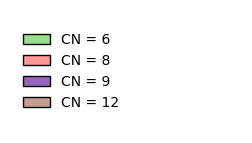

In [75]:
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

def coordination_numbers(atoms, cutoff=3.0):
    from ase.neighborlist import NeighborList
    """Retourne un tableau des CN pour chaque atome."""
    cutoffs = [cutoff/2.0] * len(atoms)  # rayon de coupure (simplifié)
    nl = NeighborList(cutoffs, self_interaction=False, bothways=True)
    nl.update(atoms)

    cn = np.zeros(len(atoms), dtype=int)
    for i in range(len(atoms)):
        indices, offsets = nl.get_neighbors(i)
        cn[i] = len(indices)
    return cn

# --- palette fixe CN 1→20 ---
def cn_palette():
    import matplotlib
    cmap = matplotlib.colormaps.get_cmap("tab20").resampled(20)  # 20 couleurs discrètes
    return {cn: matplotlib.colors.to_hex(cmap(cn-1)) for cn in range(1, 21)}

def colors_for_cn(cn, palette):
    return [palette[val] for val in cn]
import py3Dmol

def view_atoms_colored(atoms, colors, stick_radius=0.1, sphere_scale=0.6):
    """Affiche un Atoms ASE en ball+stick avec couleurs personnalisées."""
    from ase.io import write
    import io
    buf = io.StringIO()
    write(buf, atoms, format="xyz")
    xyz_str = buf.getvalue()
    buf.close()

    v = py3Dmol.view(width=600, height=600)
    v.addModel(xyz_str, "xyz")

    # appliquer les couleurs atome par atome
    for atom, color in zip(atoms, colors):
        v.setStyle({"serial": atom.index},
                        {"sphere": {"color": color, "scale": sphere_scale},
                         "stick": {"radius": stick_radius, "color": "gray"}})
    v.zoomTo()
    return v


# Nombres de coordination
cn = coordination_numbers(ico, cutoff=3.2)

# Palette CN 1→20
palette = cn_palette()
colors = colors_for_cn(cn, palette)

# Visualiser
v = view_atoms_colored(ico, colors)
v.show()

# --- légende graphique : une ligne par CN ---
unique_cns = sorted(set(cn))
legend_elements = [Patch(facecolor=palette[val], edgecolor="k", label=f"CN = {val}")
                   for val in unique_cns]

fig, ax = plt.subplots(figsize=(3, len(unique_cns)*0.4))
ax.axis("off")
ax.legend(handles=legend_elements, loc="center left", frameon=False)
plt.show()

# Useful resources

<div class="intro">
   
- [Atomic Simulation Environment](https://ase-lib.org)
</div>

# End

In [ ]:
vID.end(cwd0)